In [6]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv(r"C:\Users\shash\Downloads\dataset.csv")

In [8]:
df.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [9]:
# Step 3: Handle missing values (basic strategy)
df.fillna(df.mode().iloc[0], inplace=True)


In [12]:
# Step 4: Encode categorical variables
cat_cols = ['Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy', 'Thyroid Function',
            'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
            'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Apply label encoding to all categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [13]:
# Step 5: Feature Scaling
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])


In [14]:
# Step 6: Define features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Step 7: Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Step 8: Model evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[54  1]
 [ 3 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.95      0.86      0.90        22

    accuracy                           0.95        77
   macro avg       0.95      0.92      0.93        77
weighted avg       0.95      0.95      0.95        77



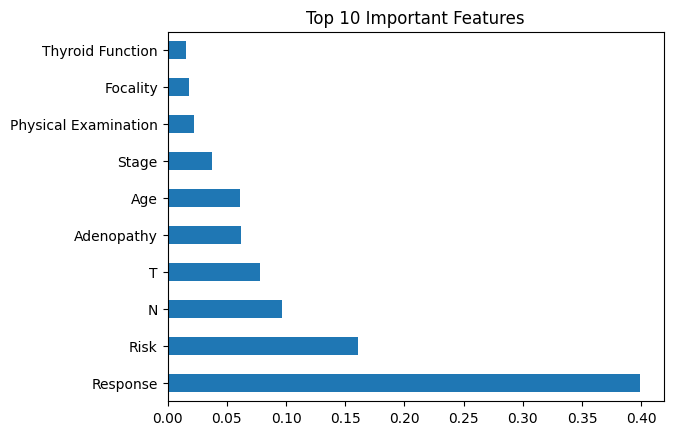

In [17]:
# Step 9: Feature importance (optional)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
